# 🔴 **Environment Setup**

In [ ]:
!pip install -q torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 11.1 MB/s eta 0:00:00


In [ ]:
!pip install -q portalocker

In [ ]:
!pip install -q wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install -q torch==2.2.1 torchtext==0.17.1 torchvision==0.17.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

# 🔴 **Import Libs**

In [ ]:
import os
from torch.nn.utils.rnn import pad_sequence
import numpy as np
import matplotlib.pyplot as plt

import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, GloVe

import torchvision
from torchvision import transforms as TT
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.utils import make_grid

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
from torch import optim
from torch.nn import functional as F

import wandb
import tqdm
import torchmetrics as tm
from PIL import Image

In [ ]:
!python --version

Python 3.10.12


In [ ]:
for lib in [np, torch, torchtext, torchvision, tqdm]:
  print(lib.__name__, '-->', lib.__version__)

numpy --> 1.26.4
torch --> 2.2.1+cu121
torchtext --> 0.17.1+cpu
torchvision --> 0.17.1+cu121
tqdm --> 4.66.5


# 🔴 **Utils**

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
def num_trainable_params(model):
  nums = sum(p.numel() for p in model.parameters() if p.requires_grad)/1e6
  return nums

In [ ]:
def set_seed(seed):
  np.random.seed(seed)
  torch.manual_seed(seed)
  if torch.cuda.is_available():
      torch.cuda.manual_seed(seed)

# 🔴 **Arguments**

In [ ]:
seed = 8

embed_size=256
hidden_size=512
num_layers = 2
dropout_embd = 0.5
dropout_rnn = 0.5
batch_size=128
lr = 1e-2
momentum=0.9
num_epoch = 10
wandb_enable = True
seq_len = 20


In [ ]:
if wandb_enable:
  wandb_arg_name = input('Please input the WandB argument (run) name:')
  print(wandb_arg_name)

Please input the WandB argument (run) name:CNN_LSTM
CNN_LSTM


# 🔴 **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 🟠 EDA

show the images are not in train_valid_test spliting files

In [ ]:
with open('/content/drive/MyDrive/all_data/Flicker8k_Dataset/text/Flickr8k.token.txt') as f:
  lines = f.readlines()
  imgs = []
  for line in lines:
    name = line.split('#')[0]
    if name not in imgs:
      imgs.append(name)
with open('/content/drive/MyDrive/all_data/Flicker8k_Dataset/text/Flickr_8k.trainImages.txt') as f:
  lines = f.readlines()
  train_imgs = []
  for line in lines:
    name = line.split('#')[0].split('\n')[0]
    if name not in train_imgs:
      train_imgs.append(name)
with open('/content/drive/MyDrive/all_data/Flicker8k_Dataset/text/Flickr_8k.devImages.txt') as f:
  lines = f.readlines()
  valid_imgs = []
  for line in lines:
    name = line.split('#')[0].split('\n')[0]
    if name not in valid_imgs:
      valid_imgs.append(name)
with open('/content/drive/MyDrive/all_data/Flicker8k_Dataset/text/Flickr_8k.testImages.txt') as f:
  lines = f.readlines()
  test_imgs = []
  for line in lines:
    name = line.split('#')[0].split('\n')[0]
    if name not in test_imgs:
      test_imgs.append(name)
used_imgs = train_imgs + test_imgs + valid_imgs
unused_imgs = []
for item in imgs:
  if item not in used_imgs and item[-4:]=='.jpg':
    unused_imgs.append(item)

In [ ]:
len(unused_imgs)

91

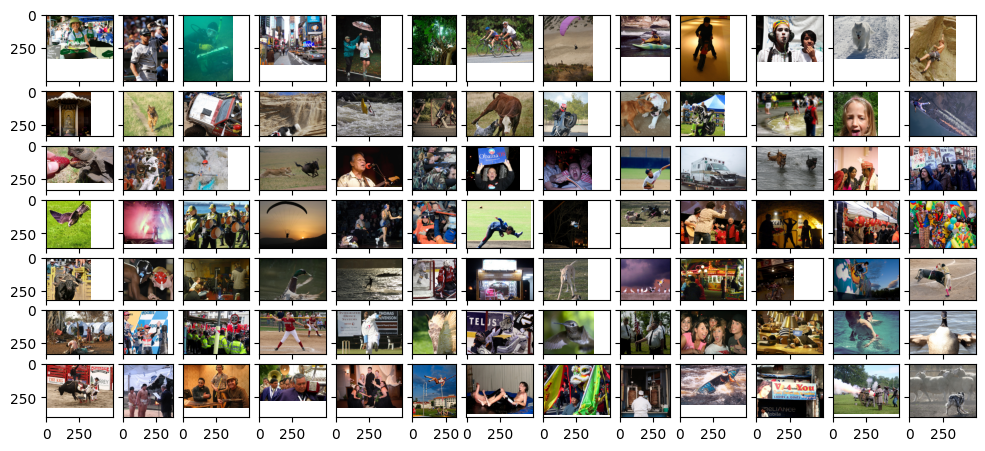

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import ImageGrid


fig = plt.figure(figsize=(12, 12))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(7, 13),  # creates 2x2 grid of Axes
                 axes_pad=0.1,  # pad between Axes in inch.
                 )

for ax, im in zip(grid, unused_imgs):
    img = plt.imread(os.path.join('/content/drive/MyDrive/all_data/Flicker8k_Dataset/image', im))
    ax.imshow(img)

plt.show()

## 🟠 Custom dataset

In [ ]:
class FlickrDataset(Dataset):
  def __init__(self, phase, target_transform=None, image_transform=None, root='/content/drive/MyDrive/all_data/Flicker8k_Dataset/image/'):
    self.root = root
    self.target_transform = target_transform
    self.image_transform = image_transform
    if phase=='train':
      images = train_imgs
    elif phase=='valid':
      images = valid_imgs
    elif phase=='test':
      images = test_imgs
    else:
      raise print('your entered phase must be one of "train" or "valid" or "test"')

    self.images = images

    with open('/content/drive/MyDrive/all_data/Flicker8k_Dataset/text/Flickr8k.token.txt') as f:
      lines = f.readlines()
    self.text = []
    self.image = []
    for im_name in images:
      for line in lines:
        if line.split('#')[0]==im_name:
          self.text.append(line.split('#')[1].replace('\t', '').replace('\n', '')[1:])
          self.image.append(im_name)


  def __getitem__(self, index):
    image_path = os.path.join(self.root, self.image[index])
    img = Image.open(image_path).convert('RGB')
    caption = self.text[index]

    if self.image_transform:
      img = self.image_transform(img)

    if self.target_transform:
      caption = self.target_transform(caption)

    return img, caption


  def __len__(self):
    return len(self.text)


In [ ]:
caps = []
with open('/content/drive/MyDrive/all_data/Flicker8k_Dataset/text/Flickr8k.token.txt') as f:
    lines = f.readlines()
for line in lines:
  caps.append(line.split('#')[1].replace('\t', '').replace('\n', '')[1:])

tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, caps), specials=['<pad>', '<unk>', '<eos>', '<sos>'])
vocab.set_default_index(vocab['<unk>'])
torch.save(vocab, '/content/drive/MyDrive/all_data/vocab.pt')


class CaptionTransform:
  def __init__(self, vocab=vocab, tokenizer=tokenizer):
    self.vocab = vocab
    self.tokenizer = tokenizer

  def __call__(self, caption):
    indices = self.vocab(self.tokenizer(caption))
    target = torch.LongTensor(self.vocab(['<sos>']) + indices + self.vocab(['<eos>']))
    return target

  def __repr__(self):
    return f"""CaptionTransform([
      _load_captions(),
      tokenizer('basic_english'),
      vocab(vocab_size={len(self.vocab)})
    ])"""
caption_transform = CaptionTransform()

transform_train = TT.Compose([TT.Resize((256, 256)),
                              TT.CenterCrop(224),
                              TT.ToTensor(),
                              TT.Normalize(mean=[0.485, 0.456, 0.406],
                                           std=[0.229, 0.224, 0.225])])

transform_test = TT.Compose([TT.Resize((224, 224)),
                            TT.ToTensor(),
                            TT.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])])


In [ ]:
train = FlickrDataset('train', caption_transform, transform_train)
valid = FlickrDataset('valid', caption_transform, transform_test)
test = FlickrDataset('test', caption_transform, transform_test)

In [ ]:
len(train), len(valid), len(test)

(30000, 5000, 5000)

In [ ]:
i = 1000

train.__getitem__(i)[0].shape, train.__getitem__(i)[1]

(torch.Size([3, 224, 224]),
 tensor([   3,    4,   30,   11, 1545,    4,  131,    6,    4,  225,  230,    2]))

## 🟠 Define a dataloader

In [ ]:
def collate_fn(data):
    tensors, targets = zip(*data)
    features = pad_sequence(targets, padding_value=vocab['<pad>'], batch_first=True)
    tensors = torch.stack(tensors)
    return tensors, features

In [ ]:
train_loader = DataLoader(train, 32, True, collate_fn=collate_fn)
valid_loader = DataLoader(valid, 64, False, collate_fn=collate_fn)
test_loader = DataLoader(test, 64, False, collate_fn=collate_fn)

In [ ]:
torch.save(train_loader, '/content/drive/MyDrive/all_data/train.pt')
torch.save(valid_loader, '/content/drive/MyDrive/all_data/valid.pt')
torch.save(test_loader, '/content/drive/MyDrive/all_data/test.pt')

In [ ]:
x, y = next(iter(train_loader))

In [ ]:
x.shape, y.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 22]))

In [ ]:
y.shape

torch.Size([32, 22])

# 🔴 **Model**

In [ ]:
class Encoder(nn.Module):
  def __init__(self, embed_size):
    super().__init__()
    self.resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
    self.resnet.requires_grad_(False)
    feature_size = self.resnet.fc.in_features

    self.resnet.fc = nn.Identity()
    self.fc = nn.Linear(feature_size, embed_size)
    self.bn = nn.BatchNorm1d(embed_size)

  def forward(self, x):
    self.resnet.eval()
    with torch.no_grad():
      features = self.resnet(x)
    y = self.bn(self.fc(features))
    return y

In [ ]:
class Decoder(nn.Module):
  def __init__(self, embed_size, hidden_size, vocab_size, num_layers, dropout_embd, dropout_rnn, max_seq_length=20):
    super(Decoder, self).__init__()

    self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=vocab['<pad>'])
    self.dropout_embd = nn.Dropout(dropout_embd)

    self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, dropout=dropout_rnn, batch_first=True)

    self.linear = nn.Linear(hidden_size, vocab_size)

    self.max_seq_length = max_seq_length

  def init_weights(self):
    self.embedding.weight.data.uniform_(-0.1, 0.1)
    self.linear.bias.data.fill_(0)
    self.linear.weight.data.uniform_(-0.1, 0.1)

  def forward(self, features, captions):
    embeddings = self.dropout_embd(self.embedding(captions[:, :-1]))
    inputs = torch.cat((features.unsqueeze(1), embeddings), dim=1)
    outputs, _ = self.lstm(inputs)
    outputs = self.linear(outputs)
    return outputs

  def generate(self, features, captions):
    if len(captions)!=0:
      embeddings = self.dropout_embd(self.embedding(captions))
      inputs = torch.cat((features.unsqueeze(1), embeddings), dim=1)
    else:
      inputs = features.unsqueeze(1)
    outputs, _ = self.lstm(inputs)
    outputs = self.linear(outputs)
    return outputs

In [ ]:
class ImageCaptioning(nn.Module):
  def __init__(self, embed_size, hidden_size, vocab_size, num_layers, dropout_embd, dropout_rnn, max_seq_length=20):
    super(ImageCaptioning, self).__init__()
    self.encoder = Encoder(embed_size)
    self.decoder = Decoder(embed_size, hidden_size, vocab_size, num_layers, dropout_embd, dropout_rnn, max_seq_length)

  def forward(self, images, captions):
    features = self.encoder(images)
    output = self.decoder(features, captions)
    return output

  def generate(self, images, captions):
    features = self.encoder(images)
    output = self.decoder.generate(features, captions)
    return output

In [ ]:
model = ImageCaptioning(300, 500,len(vocab),  2, 0.5, 0.5)
out = model(x_temp, y_temp)

In [ ]:
out.shape

# 🔴 **Config**

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
loss_fn = nn.CrossEntropyLoss(ignore_index=vocab['<pad>'])

metric = None

NameError: name 'vocab' is not defined

In [ ]:
wandb.login(key='*******************************')

wandb: Currently logged in as: shgyg99 (shgyg99_). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# 🔴 **Train ➰**

In [ ]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, metric=None, epoch=None):
  model.train()
  loss_train = AverageMeter()
  if metric:
    metric.reset()

  with tqdm.tqdm(train_loader, unit='batch') as tepoch:
    for inputs, targets in tepoch:
      if epoch:
        tepoch.set_description(f'Epoch {epoch}')

      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs, targets)

      loss = loss_fn(outputs.reshape(-1, outputs.shape[-1]), targets.flatten())

      loss.backward()

      optimizer.step()
      optimizer.zero_grad()

      loss_train.update(loss.item(), n=len(targets))
      if metric:
        metric.update(outputs.reshape(-1, outputs.shape[-1]), targets.flatten())


      tepoch.set_postfix(loss=loss_train.avg, metric=metric.compute().item() if metric else None)
  return model, loss_train.avg, metric.compute().item() if metric else None

# 🔴 **Evaluation**

In [ ]:
def evaluate(model, test_loader, loss_fn, metric=None):
  model.eval()
  loss_eval = AverageMeter()
  if metric:
    metric.reset()

  with torch.inference_mode():
    for inputs, targets in test_loader:
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs, targets)

      loss = loss_fn(outputs.reshape(-1, outputs.shape[-1]), targets.flatten())
      loss_eval.update(loss.item(), n=len(targets))

      if metric:
        metric.update(outputs.reshape(-1, outputs.shape[-1]), targets.flatten())

      return loss_eval.avg, metric.compute().item() if metric else None


# 🔴 **Training Process 〽️**

## 🟠 Finding Hyper-parameters

### 🟡 **Step 1:** Calculate the loss for an untrained model using a few batches.


In [ ]:
model = ImageCaptioning(256, 512, len(vocab), 2, 0.5, 0.5).to(device)

inputs, targets = next(iter(train_loader))
inputs = inputs.to(device)
targets = targets.to(device)

with torch.no_grad():
  outputs = model(inputs, targets)
  loss = loss_fn(outputs.reshape(-1, outputs.shape[-1]), targets.flatten())

print(loss)

tensor(9.0948, device='cuda:0')


### 🟡 **Step 2:** Try to train and overfit the model on a small subset of the dataset.

## 🟠 Main Loop

In [ ]:
torch.cuda.empty_cache()

🔰 Define train dataloader.

In [ ]:
import multiprocessing as mp

mp.cpu_count()

2

In [ ]:
set_seed(seed)
train_loader = DataLoader(train, batch_size, True, collate_fn=collate_fn, num_workers=2, pin_memory=True)
valid_loader = DataLoader(valid, batch_size, False, collate_fn=collate_fn, num_workers=2)

🔰 Define model.

In [ ]:
set_seed(seed)
model = ImageCaptioning(embed_size, hidden_size, len(vocab), num_layers, dropout_embd, dropout_rnn).to(device)

🔰 Define optimizer and Set learning rate and weight decay.

In [ ]:
set_seed(seed)
# wd = 0
# optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9, nesterov=True)
optimizer = optim.AdamW(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss(ignore_index=vocab['<pad>'])
metric = None

🔰 Initialize `wandb`

In [ ]:
if wandb_enable:
  wandb.init(
      project='image-captioning',
      name=wandb_arg_name,
      config={
          'lr': lr,
          'momentum': momentum,
          'batch_size': batch_size,
          'seq_len': seq_len,
          'hidden_dim': hidden_size,
          'embedding_dim': embed_size,
          'num_layers': num_layers,
          'dropout_embed': dropout_embd,
          'dropout_lstm': dropout_rnn,
          # 'dropout_h_lstm': dropouth,
          # 'dropout_out_lstm': dropouto,
          # 'clip': clip,
      }
  )

loss_train,█▁
loss_valid,▁█
loss_train,3.76963
loss_valid,3.80449


🔰 Write code to train the model for `num_epochs` epoches.

In [ ]:
loss_train_hist = []
loss_valid_hist = []


best_loss_valid = torch.inf
epoch_counter = 0

In [ ]:
num_epochs = num_epoch

for epoch in range(num_epochs):
  # Train
  model, loss_train, _ = train_one_epoch(model,
                                        train_loader,
                                        loss_fn,
                                        optimizer,
                                        metric,
                                        epoch)
  # Validation
  loss_valid, _ = evaluate(model,
                          valid_loader,
                          loss_fn,
                          metric)

  loss_train_hist.append(loss_train)
  loss_valid_hist.append(loss_valid)



  if loss_valid < best_loss_valid:
    torch.save(model, f'/content/drive/MyDrive/all_data/model.pt')
    best_loss_valid = loss_valid
    print('Model Saved!')

  print(f'Valid: Loss = {loss_valid:.4}')
  print()

  if wandb_enable:
    wandb.log({ "loss_train": loss_train,
                "loss_valid": loss_valid})

  epoch_counter += 1

100%|██████████| 235/235 [04:42<00:00,  1.20s/batch, loss=3.2, metric=None]


Model Saved!
Valid: Loss = 2.989



Epoch 1: 100%|██████████| 235/235 [04:39<00:00,  1.19s/batch, loss=2.72, metric=None]


Model Saved!
Valid: Loss = 2.897



Epoch 2: 100%|██████████| 235/235 [04:39<00:00,  1.19s/batch, loss=2.55, metric=None]


Valid: Loss = 2.911



Epoch 3: 100%|██████████| 235/235 [04:42<00:00,  1.20s/batch, loss=2.44, metric=None]


Model Saved!
Valid: Loss = 2.891



Epoch 4: 100%|██████████| 235/235 [04:38<00:00,  1.19s/batch, loss=2.35, metric=None]


Model Saved!
Valid: Loss = 2.882



Epoch 5: 100%|██████████| 235/235 [04:37<00:00,  1.18s/batch, loss=2.29, metric=None]


Valid: Loss = 2.882



Epoch 6: 100%|██████████| 235/235 [04:38<00:00,  1.18s/batch, loss=2.23, metric=None]


Valid: Loss = 2.892



Epoch 7:  50%|█████     | 118/235 [02:23<02:22,  1.22s/batch, loss=2.16, metric=None]
Exception in thread Thread-47 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 53, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 30, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 495, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 57, in detac

KeyboardInterrupt: 

In [ ]:
wandb.finish()

loss_train,█▅▅▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▁▁▁▁
loss_valid,█▇▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁
loss_train,2.23281
loss_valid,2.89177


## 🟠 Plot

🔰 Plot learning curves

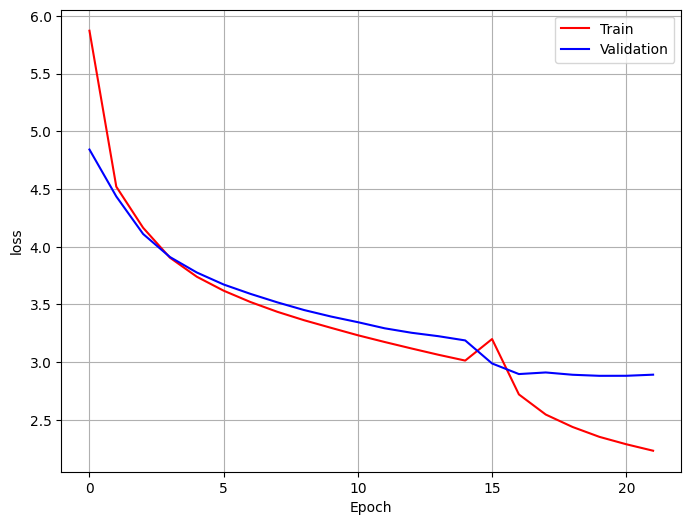

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(range(epoch_counter), loss_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

# 🔴 **Test**

In [ ]:
model = torch.load('/content/drive/MyDrive/all_data/model.pt', map_location=device)
test_loader = torch.load('/content/drive/MyDrive/all_data/test.pt')
vocab = torch.load('/content/drive/MyDrive/all_data/vocab.pt')
loss_fn = nn.CrossEntropyLoss(ignore_index=vocab['<pad>'])

In [ ]:
loss_test, _ = evaluate(model, test_loader, loss_fn)
loss_test

2.857201099395752

# 🔴 **Caption**

In [ ]:
model = torch.load('/content/drive/MyDrive/all_data/model.pt', map_location=device)
model.eval()
test_loader = torch.load('/content/drive/MyDrive/all_data/test.pt')
vocab = torch.load('/content/drive/MyDrive/all_data/vocab.pt')
loss_fn = nn.CrossEntropyLoss(ignore_index=vocab['<pad>'])


In [ ]:
def generate(image, model, vocab, max_seq_length, device):
  image = image.to(device)
  src, indices = [], []

  caption = ''
  itos = vocab.get_itos()

  for i in range(max_seq_length):
    with torch.no_grad():
      predictions = model.generate(image, src)

    idx = predictions[:, -1, :].argmax(1)
    token = itos[idx]
    caption += token + ' '

    if idx == vocab['<eos>']:
      break

    indices.append(idx)
    src = torch.LongTensor([indices]).to(device)

  return caption

<sos> a white dog is standing in a pool . <eos> 


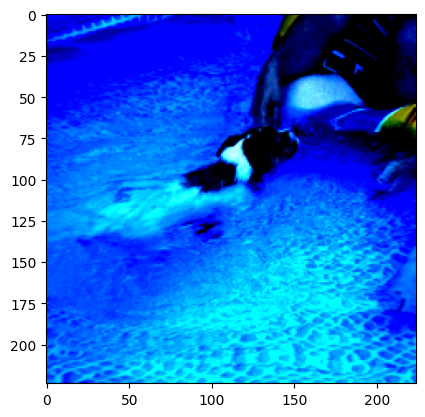

In [ ]:
x, y = next(iter(test_loader))
idx = torch.randint(0, x.shape[0], (1,))
text = generate(x[[idx], ...], model, vocab, max_seq_length=20, device=device)
plt.imshow(x[[idx], ...].squeeze(0).permute(1, 2, 0))
print(text)